**Часть 1. Предобработка данных**

1. Импортировать необходимые библиотеки и загрузить данные

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files as f
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [3]:
col_names = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Educational-num', \
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Gender', \
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Income'] 

df = pd.read_csv('adult.data', header=None, names=col_names)

df

,Age,Workclass,Fnlwgt,Education,Educational-num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2. Изучить и проанализировать данные (определить пропущенные значения,
основные статистики, типы данных и т.д.)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   Fnlwgt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Educational-num  32561 non-null  int64 
 5   Marital-status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Gender           32561 non-null  object
 10  Capital-gain     32561 non-null  int64 
 11  Capital-loss     32561 non-null  int64 
 12  Hours-per-week   32561 non-null  int64 
 13  Native-country   32561 non-null  object
 14  Income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,Age,Fnlwgt,Educational-num,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df[df == ' ?']

,Age,Workclass,Fnlwgt,Education,Educational-num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
  df.Workclass = df['Workclass'].replace(" ?", np.nan)
  df.Occupation = df.Occupation.replace(" ?", np.nan)
  df['Native-country'] = df['Native-country'].replace(' ?', np.nan) 
  df

,Age,Workclass,Fnlwgt,Education,Educational-num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.isna().sum()

Age                   0
Workclass          1836
Fnlwgt                0
Education             0
Educational-num       0
Marital-status        0
Occupation         1843
Relationship          0
Race                  0
Gender                0
Capital-gain          0
Capital-loss          0
Hours-per-week        0
Native-country      583
Income                0
dtype: int64

In [9]:
df.dropna(how = 'any', inplace = True )

In [10]:
df.isna().sum()

Age                0
Workclass          0
Fnlwgt             0
Education          0
Educational-num    0
Marital-status     0
Occupation         0
Relationship       0
Race               0
Gender             0
Capital-gain       0
Capital-loss       0
Hours-per-week     0
Native-country     0
Income             0
dtype: int64

In [11]:
print(f"Имеется {df.duplicated().sum()} повторяющихся значения.")

Имеется 23 повторяющихся значения.


In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.describe()

,Age,Fnlwgt,Educational-num,Capital-gain,Capital-loss,Hours-per-week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df.drop(['Capital-gain','Capital-loss'], axis =1, inplace = True)

In [15]:
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
df.Income.value_counts()

 <=50K    22633
 >50K      7506
Name: Income, dtype: int64

In [17]:
df.replace(to_replace = [' <=50K', ' >50K'], value = [0,1], inplace = True)

3. Создать пайплайн с использованием Pipeline и ColumnTransformer для
обработки пропущенных значений и преобразования категориальных признаков
(one-hot encoding, label encoding)

In [19]:
df = df.drop('Income', axis=1)
numeric_features = df.mode(numeric_only=True).columns.values.tolist() 
categorical_features = [c for c in df.columns if df[c].dtype.name == 'object'] 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

4. Разделить данные на обучающую и тестовую выборки

In [18]:
X = df.drop('Income', axis=1)
y = df['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

**Часть 2. Обучение базовых моделей**

1. Создать и обучить модель дерева решений с использованием Pipeline

In [20]:
tree_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',DecisionTreeClassifier(random_state=42))])
tree_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fnlwgt',
                                                   'Educational-num',
                                                   'Hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Workclass', 'Education',
                                                   'Marital-status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Gender',
                                                   'Native-country'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

2. Создать и обучить модель случайного леса с использованием Pipeline

In [21]:
rfc = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=42))])
rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fnlwgt',
                                                   'Educational-num',
                                                   'Hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Workclass', 'Education',
                                                   'Marital-status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Gender',
                                                   'Native-country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

3. Сравнить результаты моделей на тестовой выборке

In [22]:
print("DTC:")
accuracy_train = tree_clf.score(X_train, y_train)
accuracy_test = tree_clf.score(X_test, y_test)
print("Train accuracy of Decision Tree Classifier: ", accuracy_train)
print("Test accuracy of Decision Tree Classifier: ", accuracy_test, '\n')

print("RFC:")
accuracy_train = rfc.score(X_train, y_train)
accuracy_test = rfc.score(X_test, y_test)
print("Train accuracy of Decision Tree Classifier: ", accuracy_train)
print("Test accuracy of Decision Tree Classifier: ", accuracy_test)

DTC:
Train accuracy of Decision Tree Classifier:  0.9999585251544938
Test accuracy of Decision Tree Classifier:  0.7785335102853351 

RFC:
Train accuracy of Decision Tree Classifier:  0.9999585251544938
Test accuracy of Decision Tree Classifier:  0.8256469807564698


**Часть 3. Исследование различных техник оптимизации**

1. Применить кросс-валидацию для оценки качества моделей

In [23]:
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)  
print("Результаты кросс-валидации для модели дерева решений:")
print(tree_scores)
print("Средняя точность модели дерева решений:", tree_scores.mean())

rfc_scores = cross_val_score(rfc, X_train, y_train, cv=5)
print("Результаты кросс-валидации для модели случайного леса:")
print(rfc_scores)
print("Средняя точность модели случайного леса:", rfc_scores.mean())

Результаты кросс-валидации для модели дерева решений:
[0.77690234 0.77187889 0.76130236 0.768146   0.77498963]
Средняя точность модели дерева решений: 0.770643844780467
Результаты кросс-валидации для модели случайного леса:
[0.82998134 0.82206553 0.81169639 0.81625881 0.82330983]
Средняя точность модели случайного леса: 0.8206623815288505



2. Исследовать важность признаков для каждой из моделей

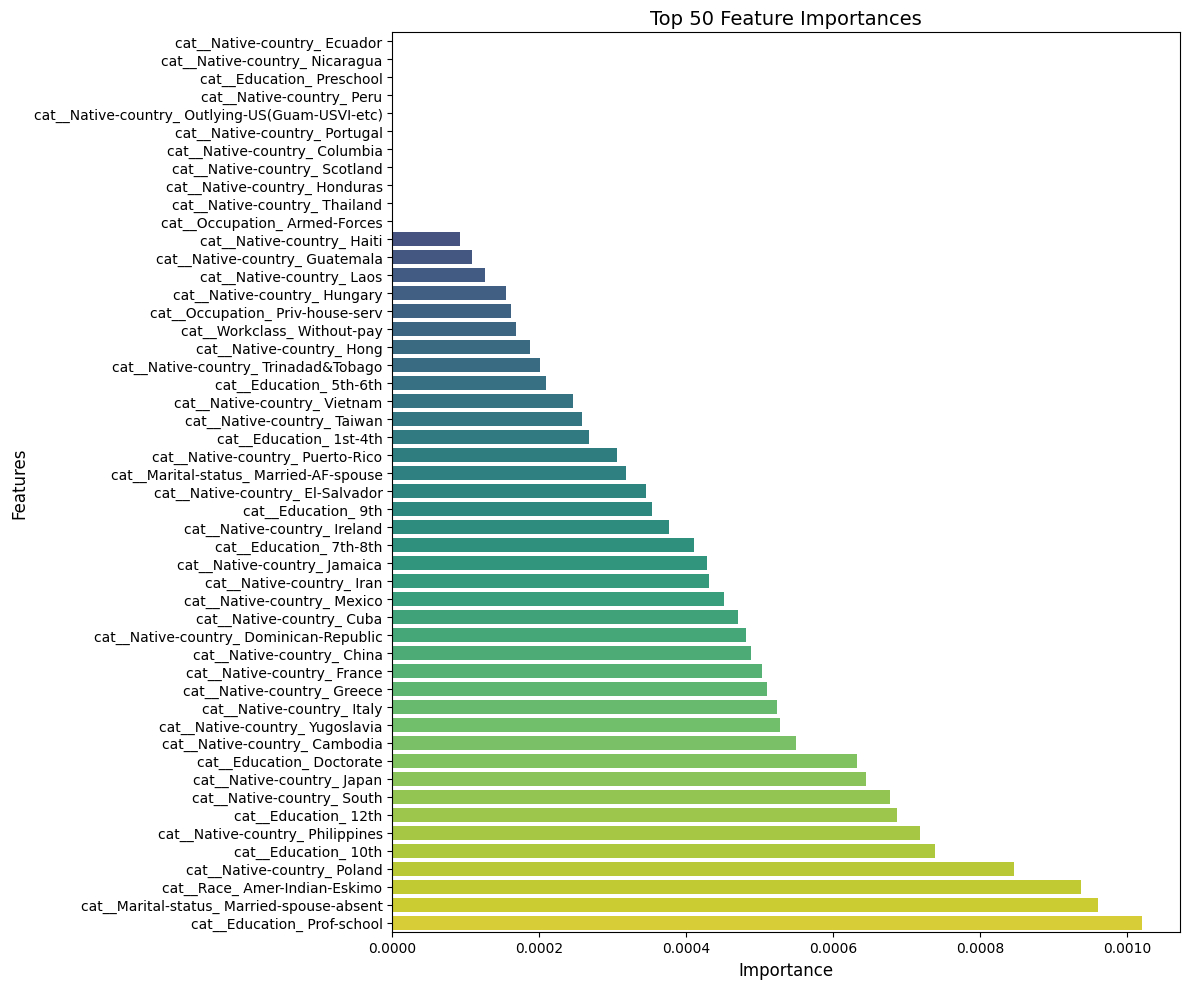

In [24]:
feat_importances = pd.DataFrame(
    tree_clf.steps[1][1].feature_importances_,
    index=preprocessor.get_feature_names_out(),
    columns=["Importance"]
)
feat_importances = feat_importances.sort_values(by='Importance', ascending=True)
top_50_features = feat_importances[:50]

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y=top_50_features.index, data=top_50_features, palette='viridis')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top 50 Feature Importances", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


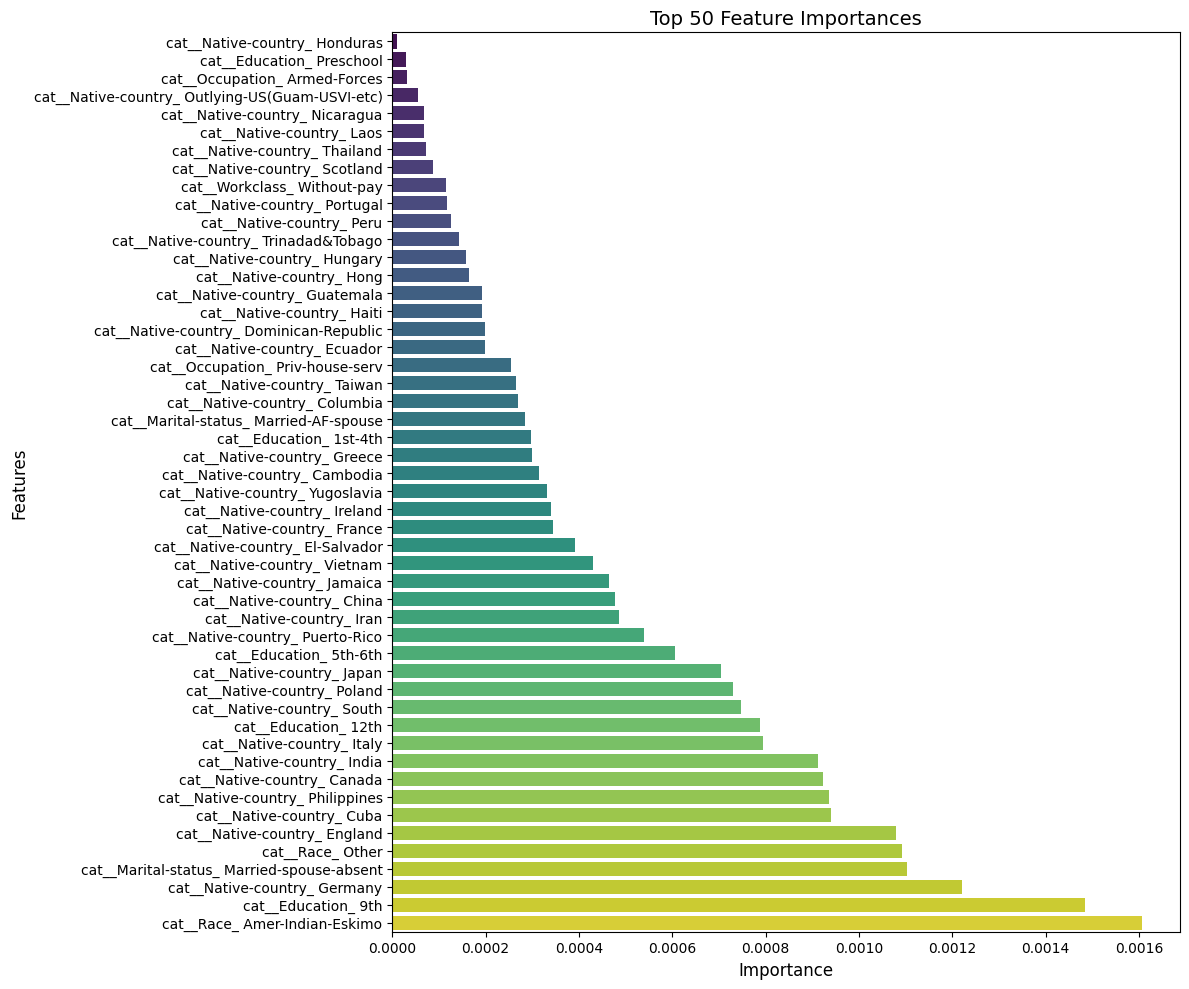

In [25]:
feat_importances = pd.DataFrame(
    rfc.steps[1][1].feature_importances_,
    index=preprocessor.get_feature_names_out(),
    columns=["Importance"]
)
feat_importances = feat_importances.sort_values(by='Importance', ascending=True)
top_50_features = feat_importances[:50]

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y=top_50_features.index, data=top_50_features, palette='viridis')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top 50 Feature Importances", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


3. Настроить гиперпараметры моделей с использованием GridSearchCV или
RandomizedSearchCV

In [26]:
param_grid = {
    "classifier__max_depth": [c for c in range(15, 26)],
}

model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=42, verbose=1, n_jobs=2))])
search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=4)
search.fit(X_train, y_train)

accuracy_train = search.score(X_train, y_train)
accuracy_test = search.score(X_test, y_test)
print("Train accuracy of Decision Tree Classifier: ", accuracy_train)
print("Test accuracy of Decision Tree Classifier: ", accuracy_test)
print(search.best_score_)
print(search.best_params_)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    9.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


Train accuracy of Decision Tree Classifier:  0.8931193231305213
Test accuracy of Decision Tree Classifier:  0.8380889183808892
0.8358423230041521
{'classifier__max_depth': 17}


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


**Часть 4. Выбор метрики качества**

1. Оценить качество моделей с использованием различных метрик (Accuracy,
Precision, Recall, F1-score, ROC-AUC)

In [31]:
y_pred = search.predict(X_test)

list_y_test = list(y_test)
list_y_pred = list(y_pred)

mapping = {' >50K': 1, ' <=50K': 0}

numeric_y_pred = pd.Series(list_y_pred).map(mapping)
numeric_y_test = pd.Series(list_y_test).map(mapping)

print("Accuracy:", accuracy_score(list_y_test, list_y_pred))
print("Precision,   pos_label=' >50K'   :", precision_score(list_y_test, list_y_pred, pos_label=1))
print("Precision,   pos_label=' <=50K'  :", precision_score(list_y_test, list_y_pred, pos_label=0))
print("Recall,      pos_label=' >50K'   :", recall_score(list_y_test, list_y_pred, pos_label=1))
print("Recall,      pos_label=' <=50K'  :", recall_score(list_y_test, list_y_pred, pos_label=0))
print("F1-score,    pos_label=' >50K'   :", f1_score(list_y_test, list_y_pred, pos_label=1))
print("F1-score,    pos_label=' <=50K'  :", f1_score(list_y_test, list_y_pred, pos_label=0))
print("AUC-ROC                          :", roc_auc_score(list_y_test, list_y_pred))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


Accuracy: 0.8380889183808892
Precision,   pos_label=' >50K'   : 0.7471665213600698
Precision,   pos_label=' <=50K'  : 0.8594550297070273
Recall,      pos_label=' >50K'   : 0.5554115359688918
Recall,      pos_label=' <=50K'  : 0.935340022296544
F1-score,    pos_label=' >50K'   : 0.6371747211895911
F1-score,    pos_label=' <=50K'  : 0.8957932948964338
AUC-ROC                          : 0.7453757791327178


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
